In [1]:
import requests
import pandas as pd
import numpy as np
import folium

In [2]:
url  = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [4]:
import lxml
df_html = pd.read_html(url, header=0, na_values = ['Not assigned'])[0]
df_html.head()

,Postal Code,Borough,Neighborhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [8]:
df_html = df_html.rename(columns={'Neighborhood': 'Neighbourhood'})
df_html.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [9]:
df_html.dropna(subset=['Borough'], inplace=True)
df_html.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [10]:
n_empty_neighborhood = df_html[df_html['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [13]:
df_postcodes =pd.DataFrame( df_html.groupby(['Postal Code','Borough']).Neighbourhood.agg([('Neighbourhood', ', '.join)]))
df_postcodes.reset_index(inplace=True)
df_postcodes.head(5)

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [17]:
df_html.dropna(subset=['Borough'], inplace=True)

In [18]:
n_empty_neighborhood = df_html[df_html['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [19]:
print('The shape of the dataset is:',df_postcodes.shape)

The shape of the dataset is: (103, 3)


In [20]:
df_postcodes.to_csv('Toronto_Postcodes.csv')

In [21]:
url_csv = 'http://cocl.us/Geospatial_data'
df_coordinates = pd.read_csv(url_csv)
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [22]:
df_neighborhoods = pd.read_csv('Toronto_Postcodes.csv',index_col=[0])
df_neighborhoods.head()

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [28]:
df_coordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_neighborhoods.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)

In [29]:
df_neighborhoods_coordinates = pd.merge(df_neighborhoods, df_coordinates, on='PostalCode')
df_neighborhoods_coordinates.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [30]:
df_neighborhoods_coordinates.to_csv('Toronto_Postcodes_2.csv')

In [31]:
df = pd.read_csv('Toronto_Postcodes_2.csv', index_col=0)
df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [32]:
df.groupby('Borough').count()['Neighbourhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64

In [33]:
df_toronto = df[df['Borough'].str.contains('Toronto')]
df_toronto.reset_index(inplace=True)
df_toronto.drop('index', axis=1, inplace=True)
df_toronto.head()

C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [35]:
print(df_toronto.groupby('Borough').count()['Neighbourhood'])

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighbourhood, dtype: int64


In [36]:
#Create list with the Boroughs (to be used later)
boroughs = df_toronto['Borough'].unique().tolist()

In [37]:
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.66713498717948, -79.38987324871795


Assigning colors to different boroughs

In [42]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3))
    
borough_color    

{'East Toronto': '#36DEF2',
 'Central Toronto': '#A65AEF',
 'Downtown Toronto': '#7CE3EC',
 'West Toronto': '#F65920'}

In [41]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighbourhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [43]:
CLIENT_ID = '35YDWF4I0UGYMISWDWSAF2DWCSBS5GWG23OP3IOXR3WJ4JL2' # your Foursquare ID
CLIENT_SECRET = 'LXM1WZFYOE1FS1FRZ3RDO0ZSUBEHYIDDJGQJ2ERQ0OOPWHSN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [46]:
toronto_venues.shape

(1618, 7)

In [47]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


In [48]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,31,31,31,31,31,31


In [49]:
toronto_venues['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Cosmetics Shop', 'Greek Restaurant', 'Italian Restaurant',
       'Ice Cream Shop', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Dessert Shop', 'Restaurant',
       'Pizza Place', 'Juice Bar', 'Bookstore', 'Bubble Tea Shop',
       'Furniture / Home Store', 'Grocery Store', 'Spa', 'Coffee Shop',
       'Bakery', 'Caribbean Restaurant', 'Café', 'Indian Restaurant',
       'Japanese Restaurant', 'Lounge', 'Frozen Yogurt Shop',
       'American Restaurant', 'Liquor Store', 'Gym', 'Fish & Chips Shop',
       'Fast Food Restaurant', 'Sushi Restaurant', 'Park', 'Pet Store',
       'Steakhouse', 'Burrito Place', 'Movie Theater', 'Sandwich Place',
       'Intersection', 'Food & Drink Shop', 'Fish Market', 'Gay Bar',
       'Seafood Restaurant', 'Cheese Shop', 'Middle Eastern Restaurant',
       'Comfort Food Restaurant', 'Stationery Store', 'Wine Bar',
       'Thai Restaurant', 'Coworking Space', 'Latin America

In [50]:
"Italian Restaurant" in toronto_venues['Venue Category'].unique()

True

In [51]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1618, 238)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(39, 238)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.015385
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,0.000000,0.025641
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
len(to_grouped[to_grouped["Italian Restaurant"] > 0])

21

In [56]:
to_italian = to_grouped[["Neighborhoods","Italian Restaurant"]]
to_italian.head()

,Neighborhoods,Italian Restaurant
0,Berczy Park,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.043478
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.061538


In [57]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = to_italian.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2])

In [58]:
kmeans.inertia_

0.0011265942901401299

In [74]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit_transform(to_clustering)
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
 
wcss

[0.023176235499877323,
 0.005132702585570641,
 0.0011265942901401299,
 0.0004077944616229616,
 0.0002939197450945214,
 0.0002008499430141367]

Text(0, 0.5, 'Within-cluster Sum of Squares')

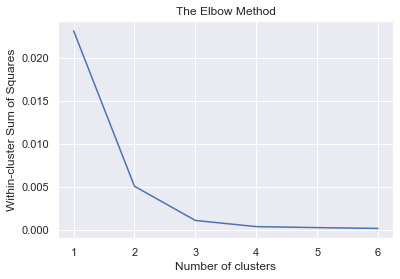

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## We used elbow method to check the optimal number of clusters which came out to be 3.

3 and 4 both can be used here, I'm just going with 3

In [75]:
toclusters = 3

to_clustering = to_italian.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2])

In [76]:
to_merged = to_italian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [77]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

,Neighborhood,Italian Restaurant,Cluster Labels
0,Berczy Park,0.000000,1
1,"Brockton, Parkdale Village, Exhibition Place",0.043478,2
2,"Business reply mail Processing Centre, South C...",0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,1
4,Central Bay Street,0.061538,0


In [78]:
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(1618, 9)


,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,1,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.0,1,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.0,1,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.0,1,43.644771,-79.373306,Meridian Hall,43.646292,-79.376022,Concert Hall
0,Berczy Park,0.0,1,43.644771,-79.373306,Hockey Hall Of Fame (Hockey Hall of Fame),43.646974,-79.377323,Museum


In [79]:
map_clusters = folium.Map(location=[lat_toronto, lon_toronto],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Cluster Labels']):
    
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [80]:
#Cluster 0
to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Italian Restaurant') ]

,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Central Bay Street,0.061538,0,43.657952,-79.387383,Mercatto,43.660391,-79.387664,Italian Restaurant
4,Central Bay Street,0.061538,0,43.657952,-79.387383,Scaddabush Italian Kitchen & Bar,43.658920,-79.382891,Italian Restaurant
4,Central Bay Street,0.061538,0,43.657952,-79.387383,Sambuca Grill,43.656110,-79.392946,Italian Restaurant
4,Central Bay Street,0.061538,0,43.657952,-79.387383,Tosto,43.661198,-79.386414,Italian Restaurant
5,Christie,0.062500,0,43.669542,-79.422564,Vinny’s Panini,43.670679,-79.426148,Italian Restaurant
8,Davisville,0.064516,0,43.704324,-79.388790,Florentia Ristorante,43.703594,-79.387985,Italian Restaurant
8,Davisville,0.064516,0,43.704324,-79.388790,Positano,43.704558,-79.388639,Italian Restaurant
16,"India Bazaar, The Beaches West",0.047619,0,43.668999,-79.315572,Casa di Giorgio,43.666645,-79.315204,Italian Restaurant
22,"Parkdale, Roncesvalles",0.071429,0,43.648960,-79.456325,Domani Restaurant & Wine Bar,43.649235,-79.450229,Italian Restaurant
28,"Runnymede, Swansea",0.052632,0,43.651571,-79.484450,Campo,43.655191,-79.487067,Italian Restaurant


In [81]:
#Cluster 1
to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Italian Restaurant') ]

,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,"First Canadian Place, Underground city",0.01,1,43.648429,-79.38228,Mercatto,43.650243,-79.38082,Italian Restaurant


In [82]:
#Cluster 2
to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Italian Restaurant') ]

,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"Brockton, Parkdale Village, Exhibition Place",0.043478,2,43.636847,-79.428191,Caffino,43.639021,-79.425289,Italian Restaurant
7,"Commerce Court, Victoria Hotel",0.030000,2,43.648198,-79.379817,Carisma,43.649617,-79.375434,Italian Restaurant
7,"Commerce Court, Victoria Hotel",0.030000,2,43.648198,-79.379817,Mercatto,43.650243,-79.380820,Italian Restaurant
7,"Commerce Court, Victoria Hotel",0.030000,2,43.648198,-79.379817,Terroni,43.650927,-79.375602,Italian Restaurant
13,"Garden District, Ryerson",0.030000,2,43.657162,-79.378937,Scaddabush Italian Kitchen & Bar,43.658920,-79.382891,Italian Restaurant
13,"Garden District, Ryerson",0.030000,2,43.657162,-79.378937,Trattoria Mercatto,43.654453,-79.380974,Italian Restaurant
13,"Garden District, Ryerson",0.030000,2,43.657162,-79.378937,Donatello Restaurant,43.657489,-79.383605,Italian Restaurant
14,"Harbourfront East, Union Station, Toronto Islands",0.030000,2,43.640816,-79.381752,Taverna Mercatto,43.642625,-79.383257,Italian Restaurant
14,"Harbourfront East, Union Station, Toronto Islands",0.030000,2,43.640816,-79.381752,Amano Pasta,43.644919,-79.382358,Italian Restaurant
14,"Harbourfront East, Union Station, Toronto Islands",0.030000,2,43.640816,-79.381752,Piazza Manna,43.641460,-79.377719,Italian Restaurant


## Majority of Italian restaurants are in Cluster 2. Through this analysis we can recommend the neighbourhoods in cluster 0 and 1 to open Italian restaurants.